In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import scipy.signal as ss
from datetime import datetime
from operator import itemgetter

In [4]:
%matplotlib notebook

## Read data
Epoch is changed from datetime to timestamp and centered to the first time.

In [7]:
dd = pd.read_csv('../../data/train.csv')
dd.epoch = pd.to_datetime(dd.epoch)
dd.epoch = dd.epoch.apply(datetime.timestamp)
dd.epoch = dd.epoch - np.min(dd.epoch)

## Fourier analysis
To compute the frequency sample we quit samples that are excessively near. After that we use 

Mean: 758.75049065159, Std. Deviation: 0.0004999126373806845


<IPython.core.display.Javascript object>


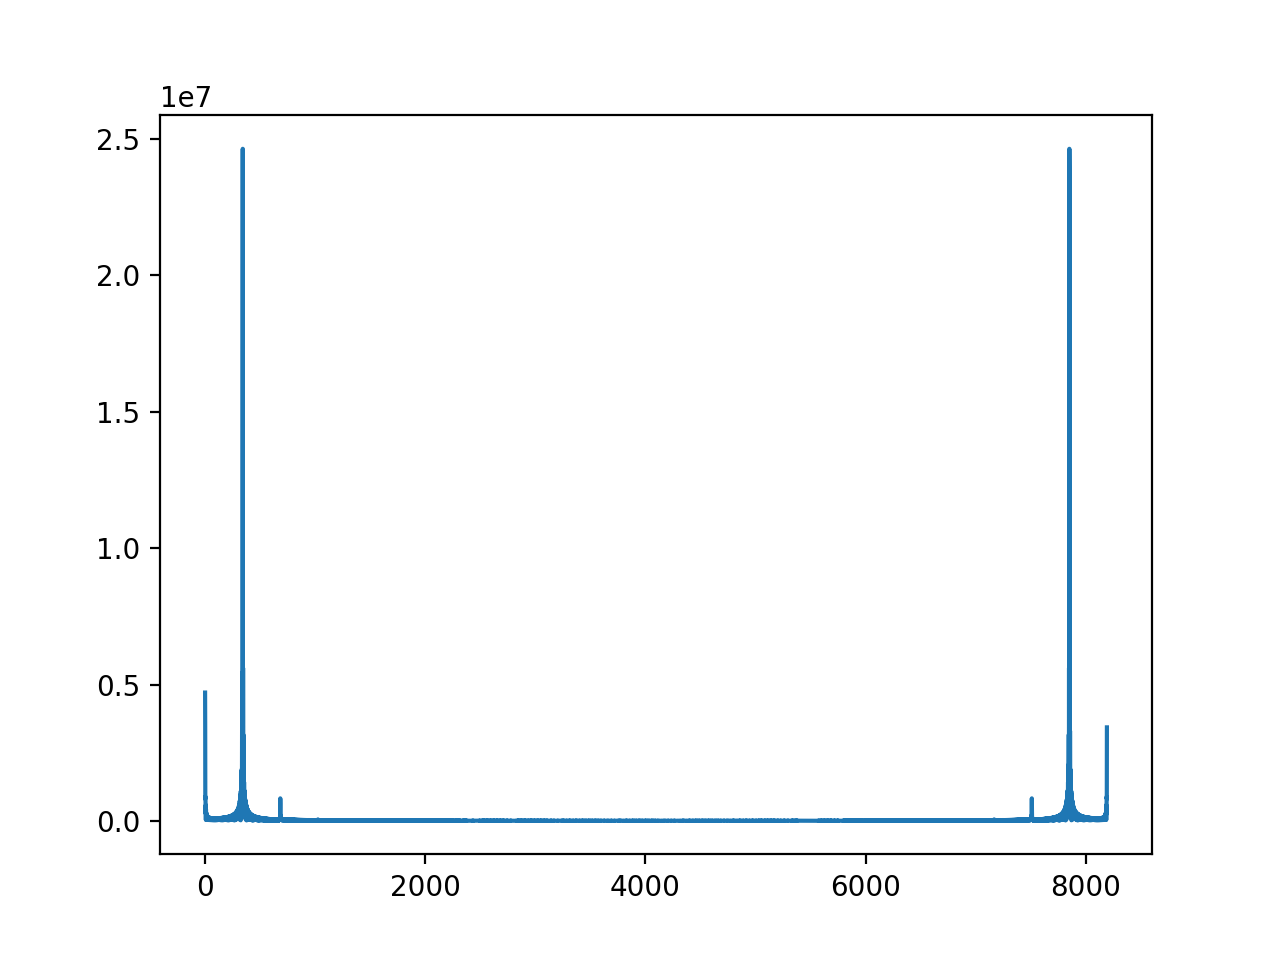

In [45]:
idx = 5
dd0 = dd[dd['sat_id']==idx]

time = []
first = True
for i in dd0.index:
    if not first:
        if (dd0.epoch[i]-dd0.epoch[i-1] > 0.01):
            time.append(dd0.epoch[i]-dd0.epoch[i-1])
    else:
        first = False
time = np.array(time)
print("Mean: {}, Std. Deviation: {}".format(np.mean(time), np.std(time)))
fs = np.mean(time)

N = 2**13
DD0x = fft(dd0.x, N)
plt.figure(0)
plt.plot(np.arange(N), abs(DD0x))

## Biggest fundamental frequency

In [142]:
def period(s_id):
    ddi = dd[dd['sat_id']==s_id]
    
    # sample frequency
    time = []
    first = True
    for i in ddi.index:
        if not first:
            if (ddi.epoch[i]-ddi.epoch[i-1] > 0.01):
                time.append(ddi.epoch[i]-ddi.epoch[i-1])
        else:
            first = False
    time = np.array(time)
    #print("Mean: {}, Std. Deviation: {}".format(np.mean(time), np.std(time)))
    T = np.mean(time)
    
    # fft
    N = 2**13
    DDix = fft(ddi.x, N)
    
    # First two max
    a = abs(DDix)
    maxs = []
    rang = 20
    if a[0] > np.max(a[1:rang+1]):
        maxs.append([a[0], 0])
    for i in range(1, len(a)//2-1):
        if a[i] > np.max(a[max(0,i-rang):i]) and a[i] > np.max(a[i+1:i+rang+1]):
            maxs.append([a[i],i])
    picos = sorted(maxs, key=itemgetter(0), reverse=True)
    
    # The rest of the max
    n = abs(picos[1][1]-picos[0][1])//2
    L = 3
    v = np.convolve(abs(DDix), np.ones(L)/L)
    maxs = []
    for i in range(len(v)//4):
        if i == 0:
            if v[i] > np.max(v[i+1:n]) :
                maxs.append(i)
        elif i < n:
            if v[i] > np.max(v[i+1:i+n]) and v[i] > np.max(v[:i]):
                maxs.append(i)
        elif v[i] > np.max(v[i-n:i]) and v[i] > np.max(v[i+1:i+n]):
            maxs.append(i)
        if len(maxs) == 5:
            break
    max_diff = []
    for i in range(1, len(maxs)):
        max_diff.append(maxs[i]-maxs[i-1])
    max_diff = np.array(max_diff)
    print("Mean: {}, sd: {}".format(np.mean(max_diff), np.std(max_diff)))
    return np.mean(max_diff)/(N*T)

In [143]:
Fs = []
for i in range(600):
    print(i)
    Fs.append(period(i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587


## Outliers
Check what the new period is similar to the last one. Except for some values. 

Note: I've modified the jupyter and Ts no longer exists so don't touch this cells as they will fail.

In [152]:
idx = 233
for idx in range(600):
    dd0 = dd[dd['sat_id']==idx]
    err = abs(dd0.epoch.iloc[25]-dd0.epoch.iloc[1] - Ts[idx])/Ts[idx]
    if (err > 0.02):
        print(idx)

487


In [161]:
idx = 4
for idx in range(600):
    dd0 = dd[dd['sat_id']==idx]
    err = abs(dd0.epoch.iloc[25]-dd0.epoch.iloc[1])/Ts[idx]
    if abs(err - 0.98) > 0.01:
        print(idx)

487


In [162]:
idx = 487
dd0 = dd[dd['sat_id']==idx]
err = abs(dd0.epoch.iloc[25]-dd0.epoch.iloc[1])/Ts[idx]
err

0.9398498557136684

## Save
Export the periods in a space separated values format

In [168]:
with open('frequencies.txt', 'w') as f:
    for item in Fs:
        f.write("%s " % item)

## Fourier series

In [29]:
# A veces no funciona, depende del numero de periodos, de time.size y del numero de coeficientes
def cn(n, time, y, T):
    num_periods = (time[-1]-time[0]) / T
    delta_t = np.array([time[i]-time[i-1] for i in range(1, len(time))])
    coef = y[1:] * np.exp(-2j * np.pi * n * time[1:] / T) * delta_t
    return coef.sum() / (num_periods * T)

def coefficients(Nh, time, y, T):
    return np.array([cn(i, time, y, T) for i in range(-Nh, Nh+1)])

def evaluate(t, Nh, time, y, coefs, T):
    f = np.array([coefs[n+Nh] * np.exp(2j * np.pi * n * t / T) for n in range(-Nh, Nh+1)])
    return f.sum()

In [162]:
xx = pd.read_csv("../Especial/corrected.csv")
TT = pd.read_csv("../../data/periods.csv")

<IPython.core.display.Javascript object>


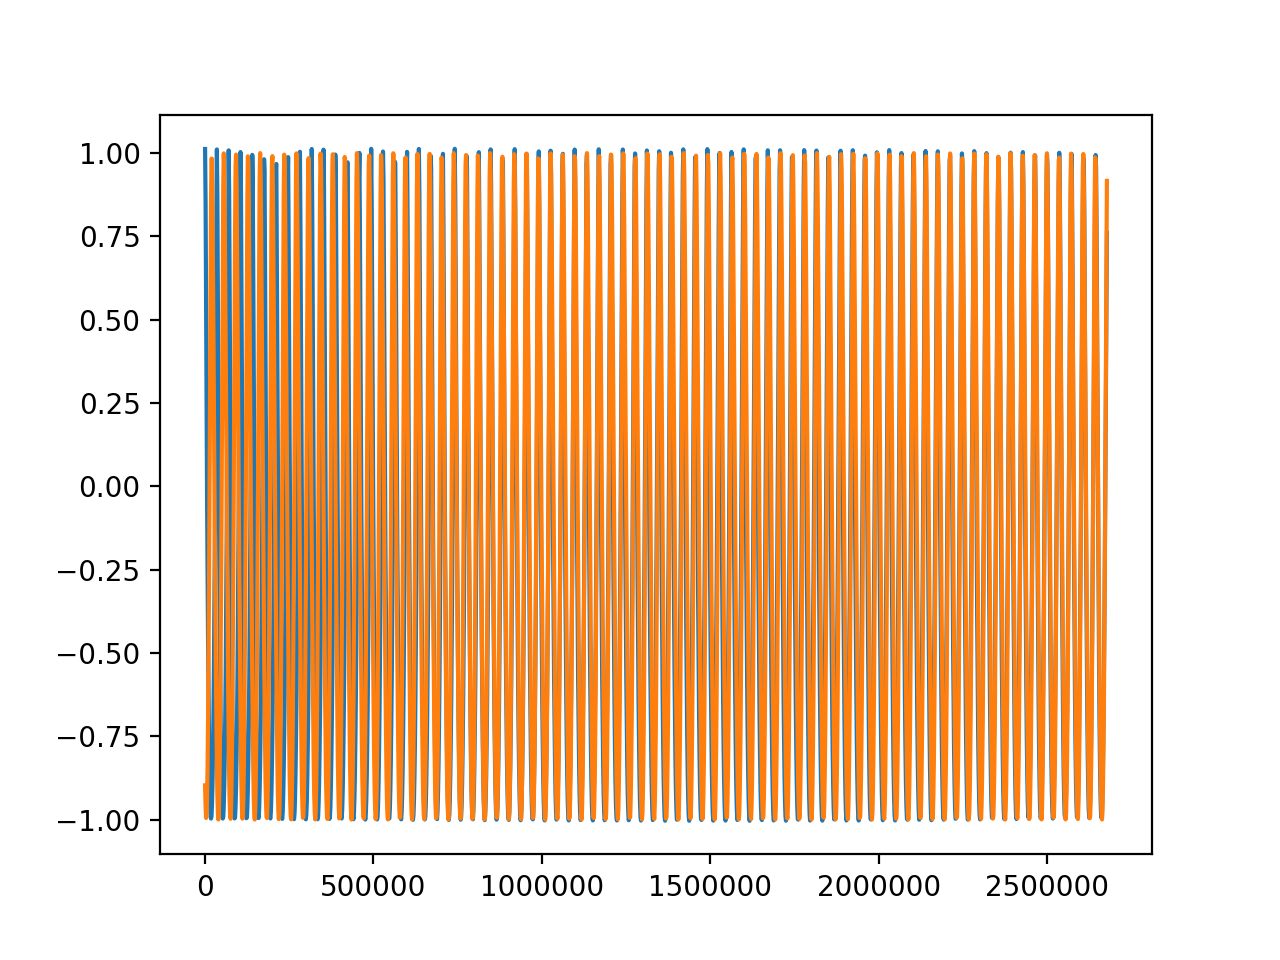

<IPython.core.display.Javascript object>


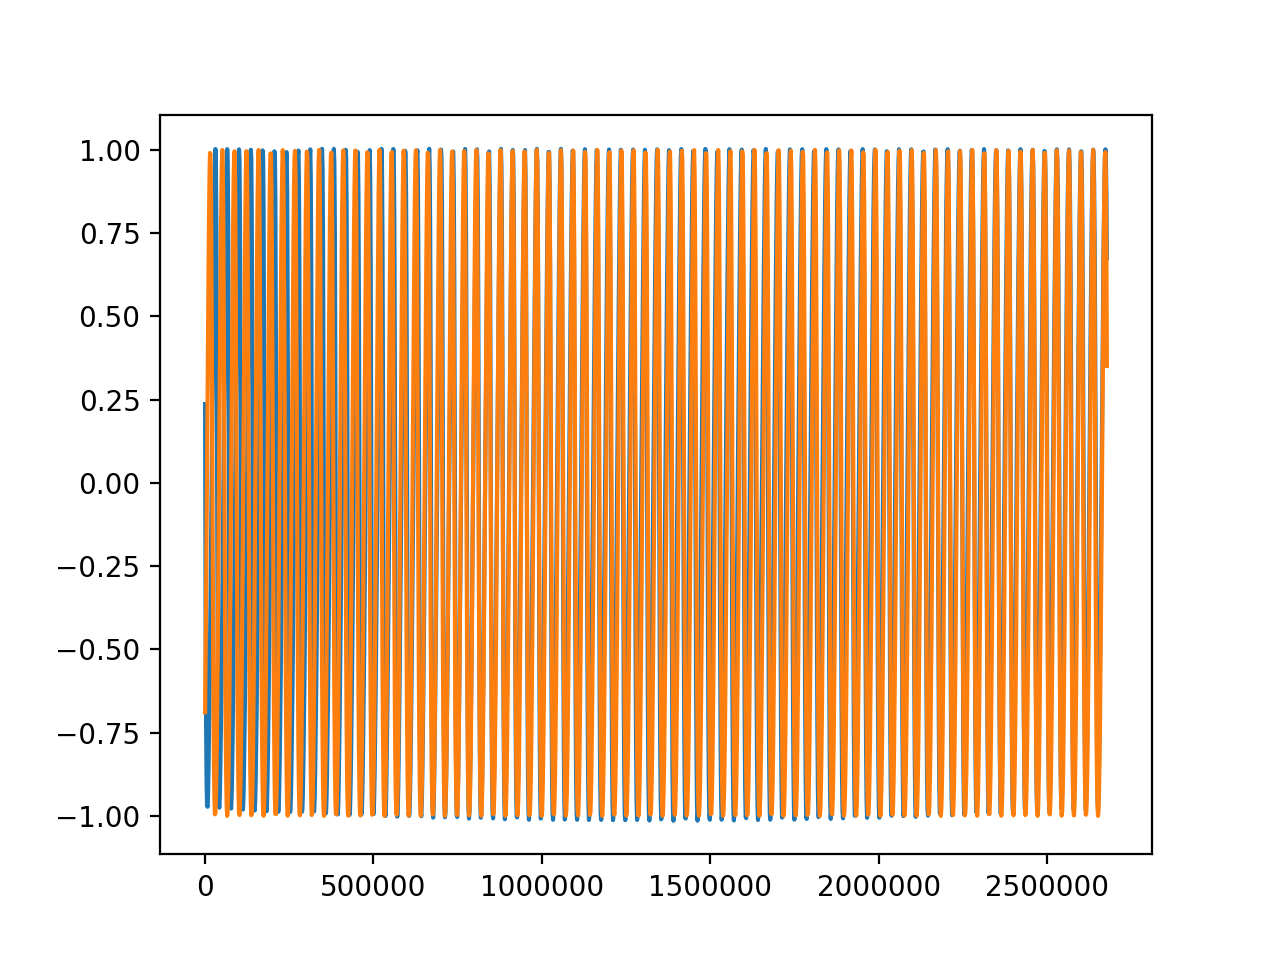

<IPython.core.display.Javascript object>


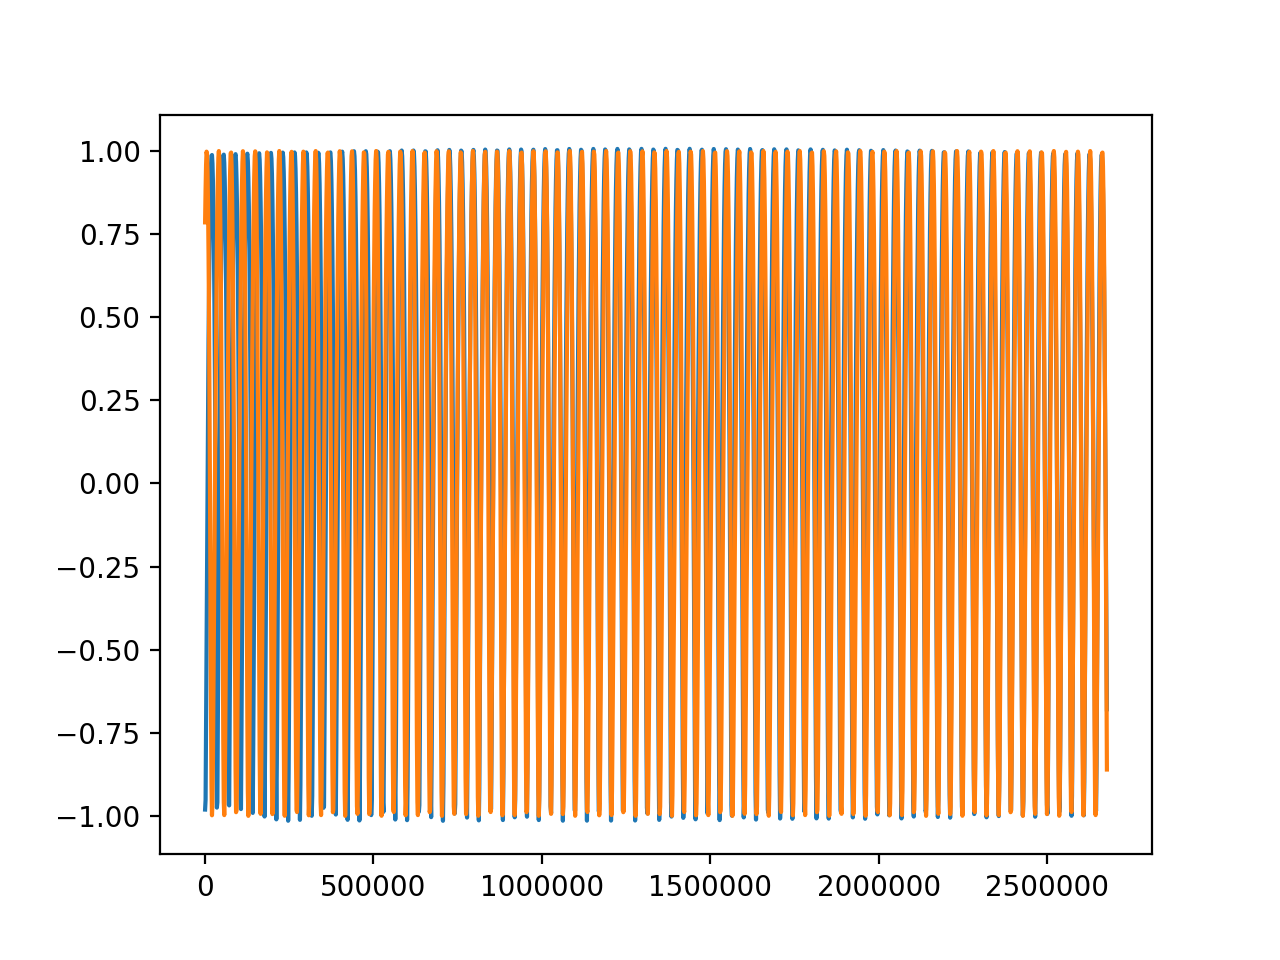

<IPython.core.display.Javascript object>


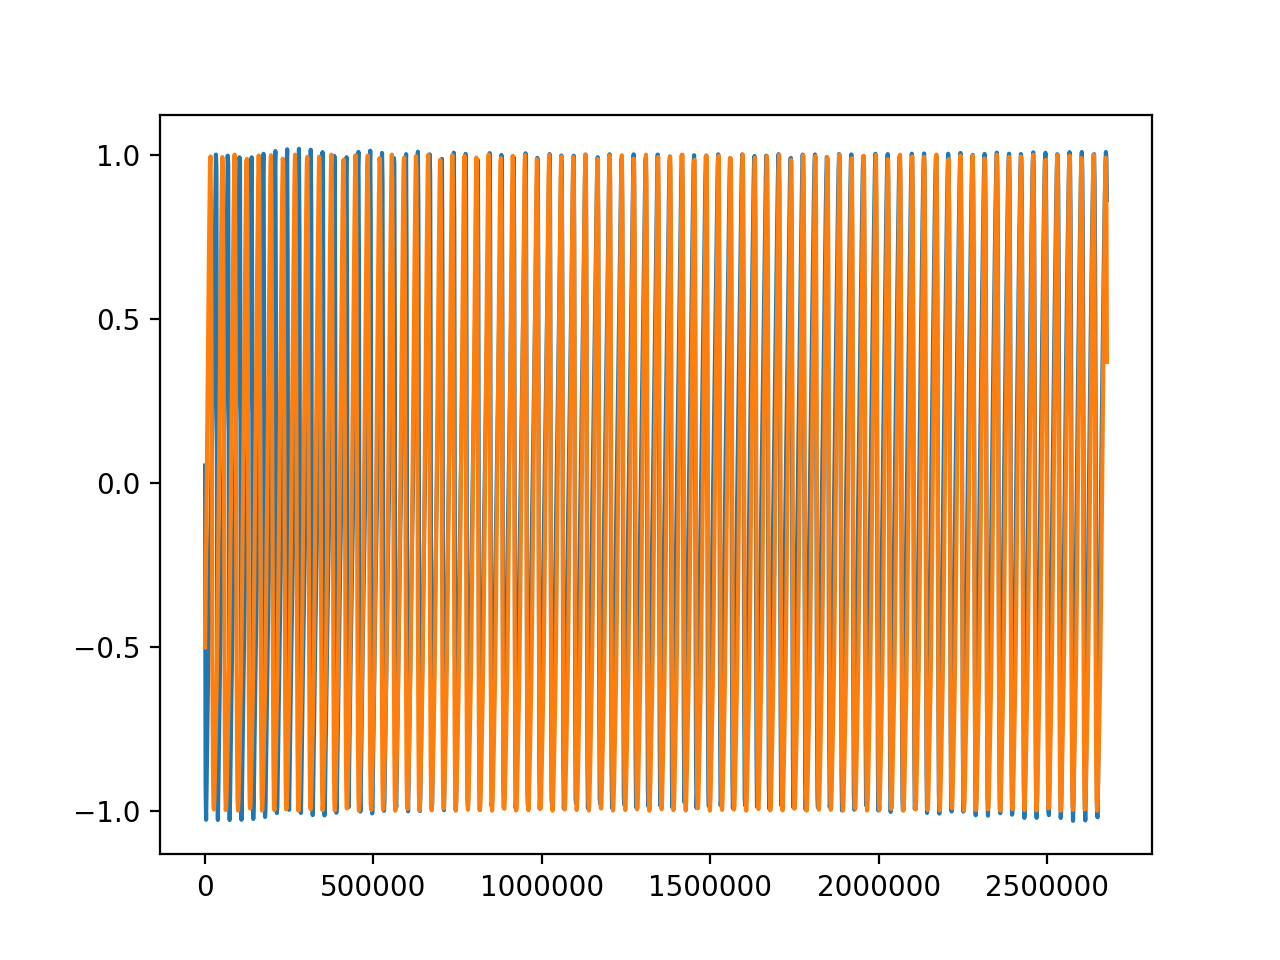

<IPython.core.display.Javascript object>


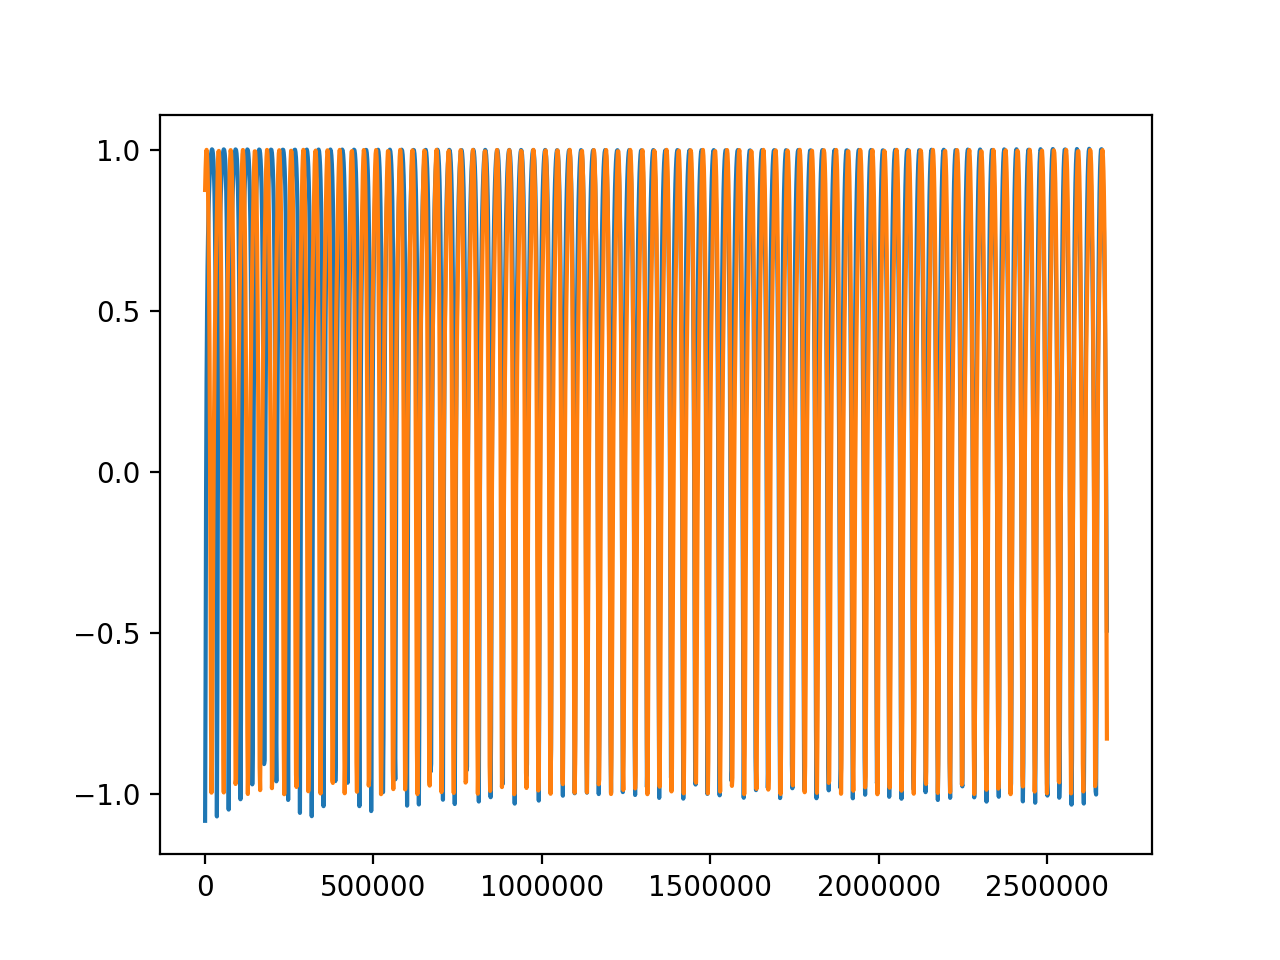

<IPython.core.display.Javascript object>


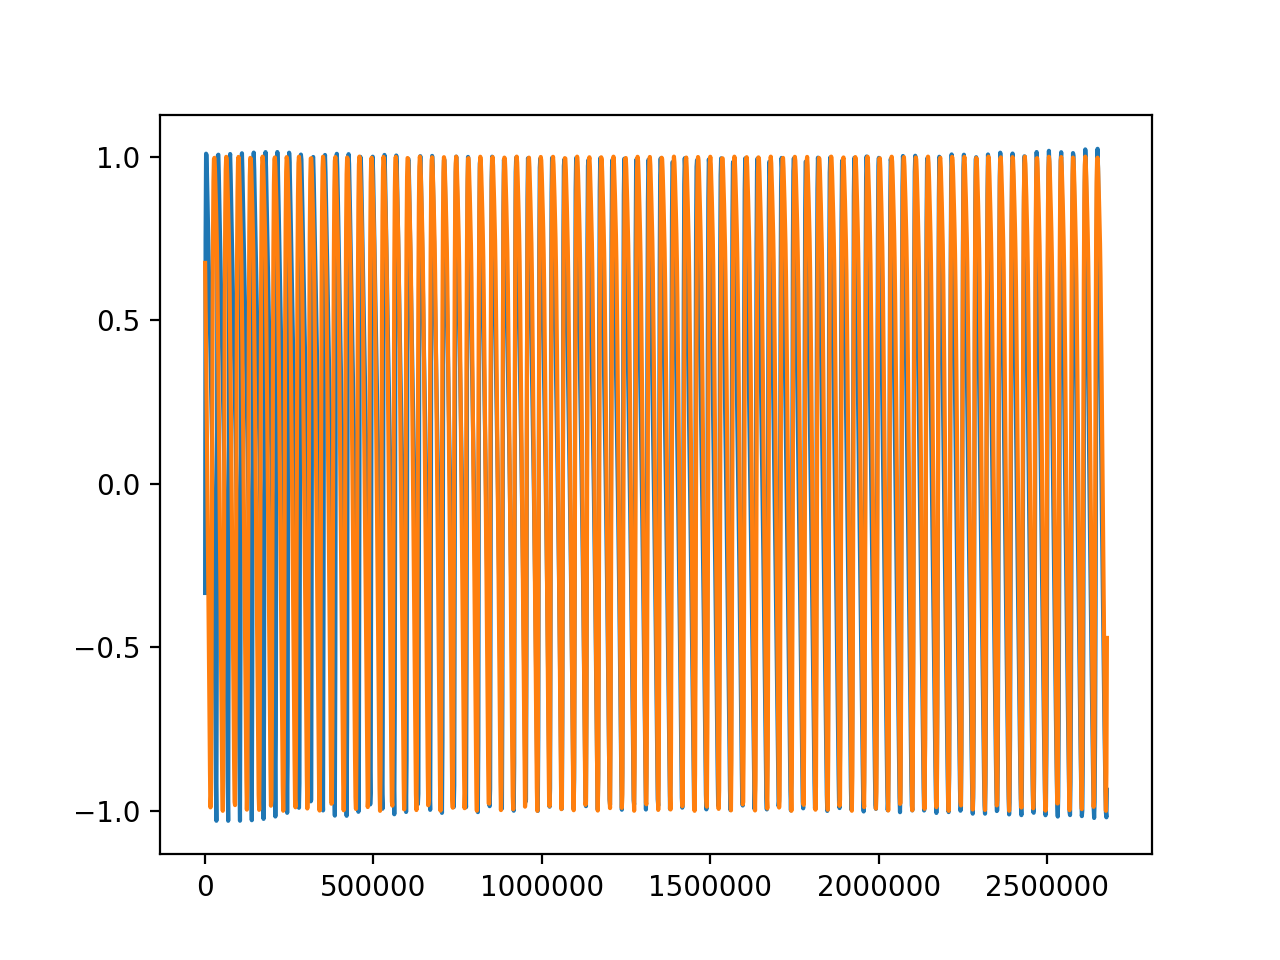

In [183]:
Nh = 10
for i in range(249,250):
    ddi = xx[xx.sat_id == i]
    T = TT.iloc[i]
    
    time = np.array(ddi.epoch)
    
    Tx = T[0]
    x = ddi.x
    cx = coefficients(Nh, time, x, Tx)
    predX = np.array([evaluate(t, Nh, time, x, cx, Tx) for t in tuple(time)]).real
    predX = (predX - np.min(predX)) * 2 / (np.max(predX) - np.min(predX)) - 1
    plt.figure(5)
    plt.plot(time, x)
    plt.plot(time, predX)
    
    Ty = T[1]
    y = ddi.y
    cy = coefficients(Nh, time, y, Ty)
    predY = np.array([evaluate(t, Nh, time, y, cy, Ty) for t in tuple(time)]).real
    predY = (predY - np.min(predY)) * 2 / (np.max(predY) - np.min(predY)) - 1
    plt.figure(6)
    plt.plot(time, y)
    plt.plot(time, predY)
    
    Tz = T[2]
    z = ddi.z
    cz = coefficients(Nh, time, z, Tz)
    predZ = np.array([evaluate(t, Nh, time, z, cz, Tz) for t in tuple(time)]).real
    predZ = (predZ - np.min(predZ)) * 2 / (np.max(predZ) - np.min(predZ)) - 1
    plt.figure(7)
    plt.plot(time, z)
    plt.plot(time, predZ)
    
    TVx = T[3]
    Vx = ddi.Vx
    cVx = coefficients(Nh, time, Vx, TVx)
    predVX = np.array([evaluate(t, Nh, time, Vx, cVx, TVx) for t in tuple(time)]).real
    predVX = (predVX - np.min(predVX)) * 2 / (np.max(predVX) - np.min(predVX)) - 1
    plt.figure(8)
    plt.plot(time, Vx)
    plt.plot(time, predVX)
    
    TVy = T[4]
    Vy = ddi.Vy
    cVy = coefficients(Nh, time, Vy, TVy)
    predVY = np.array([evaluate(t, Nh, time, Vy, cVy, TVy) for t in tuple(time)]).real
    predVY = (predVY - np.min(predVY)) * 2 / (np.max(predVY) - np.min(predVY)) - 1
    plt.figure(9)
    plt.plot(time, Vy)
    plt.plot(time, predVY)
    
    TVz = T[5]
    Vz = ddi.Vz
    cVz = coefficients(Nh, time, Vz, TVz)
    predVZ = np.array([evaluate(t, Nh, time, Vz, cVz, TVz) for t in tuple(time)]).real
    predVZ = (predVZ - np.min(predVZ)) * 2 / (np.max(predVZ) - np.min(predVZ)) - 1
    plt.figure(10)
    plt.plot(time, Vz)
    plt.plot(time, predVZ)

In [155]:
idx = 249
dd0 = dd[dd['sat_id']==idx]
x = np.array(dd0.x)
time = np.array(dd0.epoch)
Nh = 50
T = 35941.26 
coefs = coefficients(Nh, time, x, T)
prediction = np.array([evaluate(t, Nh, time, x, coefs, T) for t in tuple(time)])

<IPython.core.display.Javascript object>


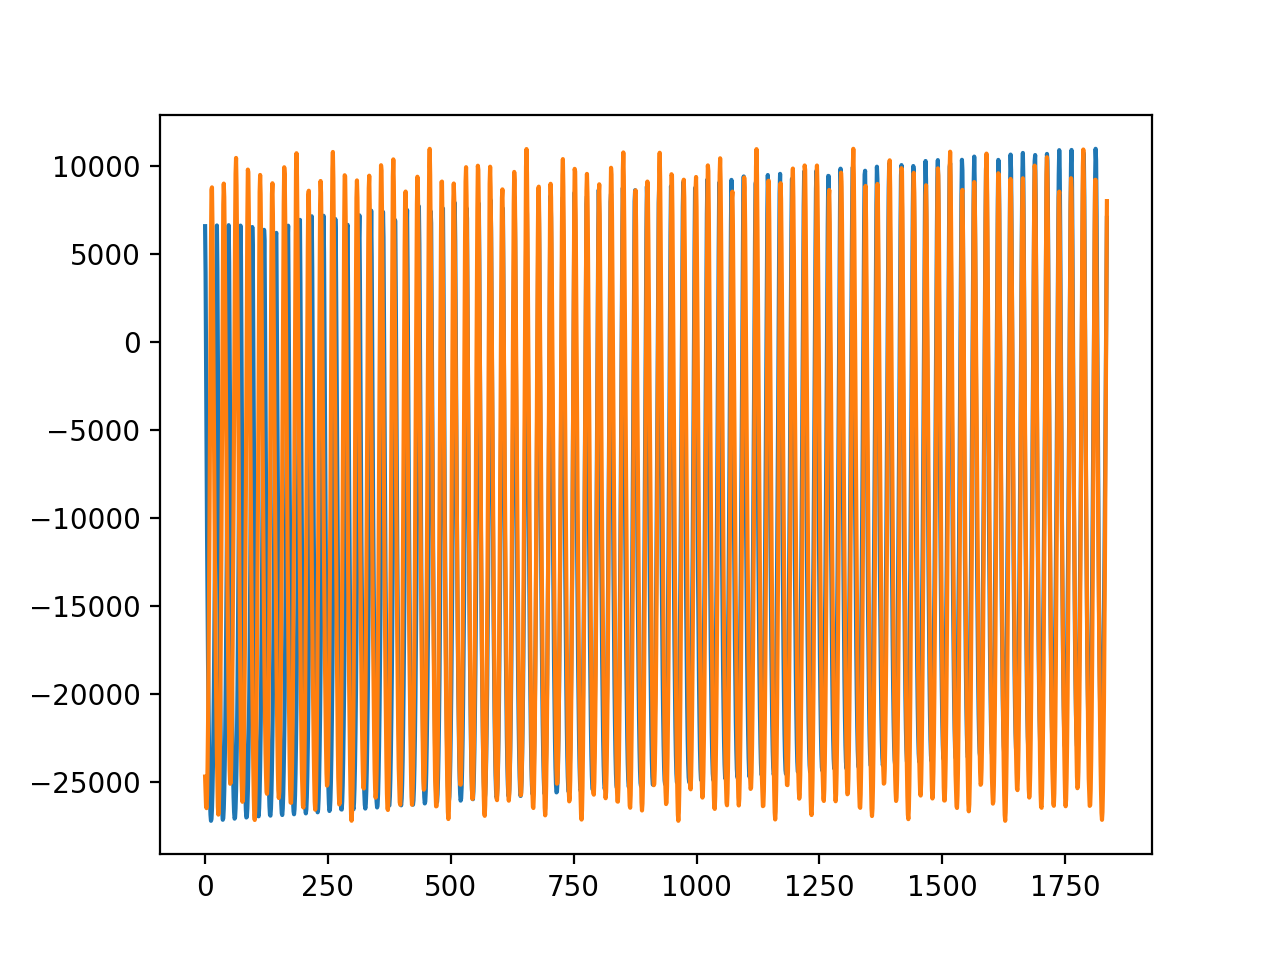

In [156]:
plt.figure(1)
plt.plot(x)
low = np.min(prediction.real)
high = np.max(prediction.real)
c = np.min(x)
d = np.max(x)
r = (d-c)/(high-low)
plt.plot((prediction.real-low)*r + c)

In [25]:
def good(ddi):
    index = []
    first = True
    for i in ddi.index:
        if not first:
            if (ddi.epoch[i]-ddi.epoch[i-1] > 0.01):
                index.append(i)
        else:
            index.append(i)
            first = False
    return len(index) == len(ddi.epoch)

In [148]:
xx = pd.read_csv("../Especial/corrected.csv")
xx.head()

id      epoch  sat_id         x         y         z        Vx        Vy  \
0   0      0.000       0 -0.876066  0.517188 -0.886135 -0.524755 -0.865635   
1   1   2803.000       0 -0.998900  0.186284 -1.001716 -0.083348 -0.999653   
2   2   5606.001       0 -0.999677 -0.153316 -0.995088  0.339336 -0.934672   
3   3   8409.001       0 -0.897015 -0.454663 -0.885888  0.658639 -0.740156   
4   4  11212.002       0 -0.722686 -0.692887 -0.706423  0.860431 -0.493594   

         Vz         x_sim         y_sim         z_sim    Vx_sim    Vy_sim  \
0 -0.508462  -8843.131454  13138.221690 -20741.615306 -0.907527 -3.804930   
1 -0.063185 -10555.500066   1649.289367 -24473.089556 -0.303704 -4.269816   
2  0.358918 -10571.858472 -10145.939908 -24271.169776  0.274880 -4.046788   
3  0.674546  -9149.620794 -20618.200201 -20765.019094  0.712437 -3.375202   
4  0.871258  -6729.358857 -28902.271436 -14992.399986  0.989382 -2.522618   

     Vz_sim  
0 -2.024133  
1 -0.616468  
2  0.718768  
3  1.718306  
4  2.342237

<IPython.core.display.Javascript object>


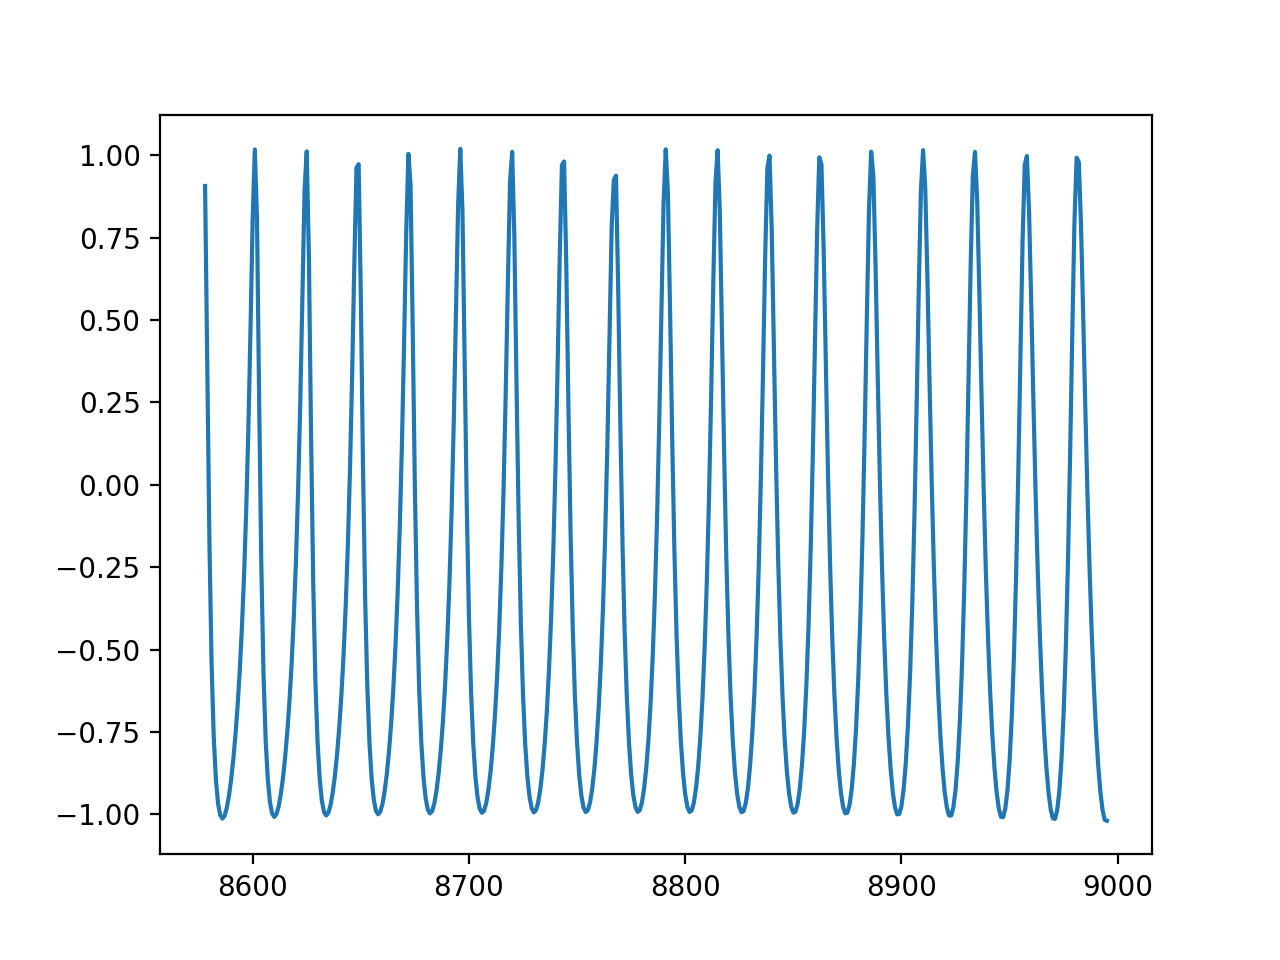

In [154]:
plt.figure(4)
plt.plot(xx[xx.sat_id==6].Vx)

In [169]:
float(TT.iloc[0][0])

67285.4664024839

In [158]:
TT.head()

V1             V2             V3             V4             V5  \
0   67285.466402   67272.012000   67269.993840   67288.830676   67291.520682   
1   30526.716881   30526.411608   30531.906374   30522.138209   30522.443421   
2  154640.099413  154624.644676  154624.644676  154828.591011  154813.105055   
3  182442.786115  181852.620731  182140.554387  181543.285241  182913.006583   
4   53290.654650   53282.662889   53282.663742   53279.999715   53275.737752   

              V6  
0   67268.641336  
1   30520.001724  
2  154840.980086  
3  181594.132724  
4   53292.786297